<a href="https://colab.research.google.com/github/Dkepffl/2022-1-ESAA/blob/main/Assignment/Assignment0527_Regression3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

## **06 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷**
____


### | **규제 선형 모델의 개요**
___
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.
- 이전까지는 선형 모델의 비용 함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려했다. 그러다보니 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커졌다. 이렇게 되면 변동성이 심해져 테스트 데이터셋에서 예측 성능이 저하된다.
- Cost 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 **RSS 최소화 방법**과 과적합을 방지하기 위해 **회귀 계수가 커지지 않도록 하는 방법**이 **균형**을 이루도록 구성되어야 한다.
- 비용 함수의 목표 :
$$ Min(RSS(W) + alpha*||W||^2_2 )$$
  + alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기를 제어하는 튜닝 파라미터
  + 위 식을 최소화하는 W 벡터를 찾는 것이 비용 함수의 목표이다.
  + alpha가 0(또는 매우 작은 값)이라면 비용 함수는 기존과 동일한 $Min(RSS(W) + 0)$이다.
  + alpha가 무한대(또는 매우 큰 값)라면 비용 함수는 $RSS(W)$에 비해 $alpha*||W||^2_2$ 값이 너무 커지게 된다. 따라서 W 값을 0으로 혹은 매우 작게 만들어야 비용 함수가 최소화될 수 있다.
  + 즉, alpha 값을 크게 하면 회귀 계수 W의 값이 작아져 과적합을 개선하며, 작게 하면, 회귀 계수 W 값이 커져도 어느 정도 상쇄가 가능해 학습 데이터 적합 정도를 개선할 수 있따.
- 이처럼 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 **규제(Regularization)**라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분된다.
  1. **L2 규제** : $alpha*||W||^2_2$와 같이 W의 제곱에 페널티를 부여하는 방식. 이를 적용한 회귀를 **릿지(Ridge)** 회귀라고 한다.
  2. **L1 규제** : $alpha*||W||_1$와 같이 W의 절댓값에 대해 페널티를 부여한다. 이를 적용한 회귀를 **라쏘(Lasso)** 회귀라고 한다. L1 규제를 적용하게 되면 영향력이 크지 않은 회귀 계수 값은 0이 된다.

### | **릿지 회귀**
___
- 사이킷런의 `Ridge` 클래스는 릿지 회귀를 구현한다.
- `Ridge` 클래스의 주요 생성 파라미터는 `alpha`이며, 릿지 회귀의 alpha L2 규제 계수를 의미한다.
- 앞 예제의 보스턴 주택 가격을 `Ridge` 클래스를 이용해 다시 예측하고, 예측 성능을 `corss_val_score()`로 평가한다.
- 이때 앞에서 만든 Feature 데이터셋인 `X_data`와 Target 데이터셋인 `y_target`을 그대로 이용한다.

In [7]:
# 앞의 LinearRegression 예제에서 분할한 feature 데이터셋인 X_data과 Target 데이터셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋을 DataFrame으로 변환 
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset의 target array는 주택 가격 
# PRICE Column으로 DataFrame에 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 : ', bostonDF.shape)

# Target/Feature 데이터셋
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

# model fitting
ridge = Ridge(alpha = 10)
# model test
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Boston 데이타셋 크기 :  (506, 14)
 5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


- 릿지의 5개 폴드 세트의 평균 RMSE는 5.518이다. 앞에서 학습한 규제가 없는 LinearRegression의 평균 RMSE 값인 5.829보다 작은 값으로, 더 뛰어난 예측 성능을 보여준다는 것을 알 수 있다.
- 이번에는 릿지의 `alpha` 값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴본다.
- alpha 값을 변할 때 RMSE와 각 Feature의 회귀 계수가 달라지는 것을 시각화하고, 그 값을 DataFrame에 저장하는 예제이다.
- 먼저 alpha 값의 변화에 따른 5 폴드의 평균 RMSE 값을 반환하는 코드부터 작성해보자.

In [10]:
# alpha값을 0, 0.1, 1, 10, 100 으로 변경하면서 RMSE 측정

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds의 평균 RMSE : 5.330 


- alpha가 100일 때, 평균 RMSE가 5.330으로 가장 작다.
- 이번에는 alpha 값의 변화에 따른 Feature의 회귀 계수 값을 가로 막대 그래프로 시각화해본다.
- 회귀 계수를 Ridge 객체의 `coef_` 속성에서 추출한 후, Series 객체로 만들고, `Seaborn`의 가로 막대 차트로 표시하고, DataFrame에 alpha 값 별 회귀 계수를 저장한다. 

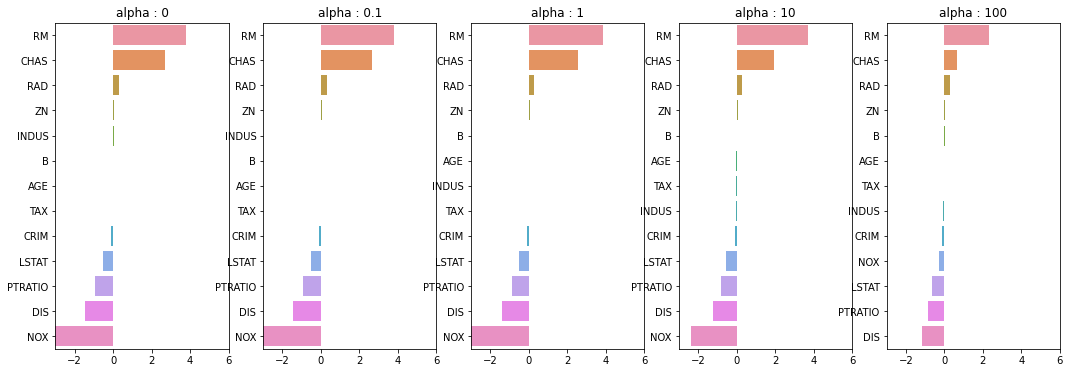

In [12]:
# alpha 값 별 회귀 계수 값을 시각화하기 위해, 5개의 열로 된 matplotlib 축 생성  
fig, axs = plt.subplots(figsize = (18 ,6) , nrows = 1 , ncols = 5)

# alpha 값 별 회귀 계수 값을 저장하기 위한 빈 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장
# pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    # model fitting
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)

    # alpha에 따른 Feature 별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가 
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns )
    colname = 'alpha : ' + str(alpha) # Column 이름 설정
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화
    coeff = coeff.sort_values(ascending = False) # 회귀 계수 값이 높은 순으로 표현
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3 ,6)
    sns.barplot(x = coeff.values , y = coeff.index, ax = axs[pos])

# for 문 밖에서 matplotlib의 show() 호출
plt.show()

- alpha 값을 증가시킬수록 회귀 계수 값이 작아진다. 특히 Nox Feature의 경우, alpha 값을 증가함에 따라, 회귀 계수가 눈에 띄게 작아진다.

In [13]:
# alpha에 따른 Feature 별 회귀 계수를 DataFrame으로 변환
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha : ' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


- alpha 값이 증가하면서 회귀 계수가 지속적으로 작아진다.
- 다만, 릿지 회귀는 회귀 계수를 0으로 만들지 않는다.

### | **라쏘 회귀**
___
- W의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘(Lasso) 회귀이다.
- 즉, L1 규제는 $alpha * ||W||_1$를 의미하며, 라쏘 회귀 비용 함수의 목표는 $RSS(W) + alpha * ||W||_1$를 최소화하는 W를 찾는 것이다.
- L2 규제는 회귀 계수의 크기를 감소시키는 반면, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다. 이러한 측면에서 L1 규제는 적절한 Feature만 회귀에 포함시키는 Feature 선택을 수행한다고 볼 수 있다.
- 사이킷런은 `Lasso` 클래스를 통해 라쏘 회귀를 구현한다.
- `Lasso` 클래스의 주요 생성 파라미터는 `alpha`로, 이는 라쏘 회귀의 alpha L1 규제 계수를 의미한다.
- 릿지 회귀 예제 코드에서 한 것처럼, `Lasso` 클래스를 이용해, `alpha` 값을 변화시키면서 결과를 출력하는 함수를 만들어보자.
- `get_linear_ret_eval()` 함수 : 회귀 모델의 이름. alpha 값들의 리스트, Feature 데이터셋과 Target 데이터셋을 입력 받아, alpha 값에 따른 폴드 평균 RMSE 값을 출력하고, 회귀 계수 값들을 DataFrame으로 반환하는 함수 

In [14]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수 값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
  coeff_df = pd.DataFrame()
  
  # verbose가 True이면 모델 이름 출력
  if verbose : print('####### ', model_name , '#######')

  for param in params:
    if model_name =='Ridge': model = Ridge(alpha = param)
    elif model_name =='Lasso': model = Lasso(alpha = param)
    elif model_name =='ElasticNet': model = ElasticNet(alpha = param, l1_ratio = 0.7)

    # 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3f} '.format(param, avg_rmse))

    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data_n , y_target_n)
    coeff = pd.Series(data = model.coef_ , index = X_data_n.columns)
                      
    # alpha에 따른 Feature 별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    colname = 'alpha : ' + str(param)
    coeff_df[colname] = coeff
    
  return coeff_df
# end of get_linear_regre_eval

- alpha 값은 [0.07, 0.1, 0.5, 1, 3]을 입력하고 모델명을 'Lasso'로 입력해, 라쏘 모델을 기반으로 alpha 값에 따라 RMSE와 회귀 계수들이 어떻게 변화하는지 출력해보자.

In [15]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.189 


- alpha가 0.07 일 때, 평균 RMSE 값이 가장 작다.
- 릿지 회귀에서의 평균 RMSE 값인 5.330보다는 크지만, 규제가 없는 LinearRegression의 평균 RMSE 값인 5.829보다는 작다.
- alpha 값에 따른 Feature 별 회귀 계수를 출력해보자.

In [16]:
# 반환된 coeff_lasso_df를 첫번째 Column 순으로 내림차순 정렬하여 회귀계수 DataFrame 력
sort_column = 'alpha : ' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False) # 내림차순

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- alpha의 크기가 증가함에 따라 일부 Feature의 회귀 계수가 아예 0으로 바뀐다.
- NOX 속성은 alpha가 0.07일 때부터 회귀 계수가 0이며, alpha가 증가하면서 INDUS, CHAS와 같은 Feature의 회귀 계수가 0으로 바뀐다.
- 회귀 계수가 0인 Feature는 회귀 식에서 제외되면서, Feature 선택의 효과를 얻을 수 있다.

### | **엘라스틱넷 회귀**
___

### | **선형 회귀 모델을 위한 데이터 변환**
___

## **07 로지스틱 회귀**
____

## **07 회귀 트리**
____